LIBRARIES


In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [160]:
import tensorflow as tf

DATA


In [161]:
df = pd.read_csv('C:/Users/lijaz/Desktop/DATA/Crop/crop_yield.csv')


In [162]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [163]:
df['Crop'].unique()

array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

SELECTING A CROP

In [164]:
df = df[df['Crop']=='Rice']
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
16,Rice,1997,Autumn,Assam,607358.0,398311,2051.4,5.780226e+07,188280.98,0.780870
17,Rice,1997,Summer,Assam,174974.0,209623,2051.4,1.665228e+07,54241.94,1.060435
18,Rice,1997,Winter,Assam,1743321.0,1647296,2051.4,1.659119e+08,540429.51,0.941304
51,Rice,1997,Kharif,Karnataka,1031530.0,2340493,1266.7,9.817071e+07,319774.30,2.233500
52,Rice,1997,Rabi,Karnataka,53889.0,109350,1266.7,5.128616e+06,16705.59,2.073846


CHECKING FOR NULL AND DUPLICATES

In [165]:
df.isna().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [166]:
df.duplicated().sum()

0

NO NULL OR DUPLICATES FOUND

Filtering

In [167]:
needed = ['Fertilizer', 'Pesticide', 'Yield']
bf = df[needed]

PLOTS :

GROWTH BY YEAR

OF KERALA

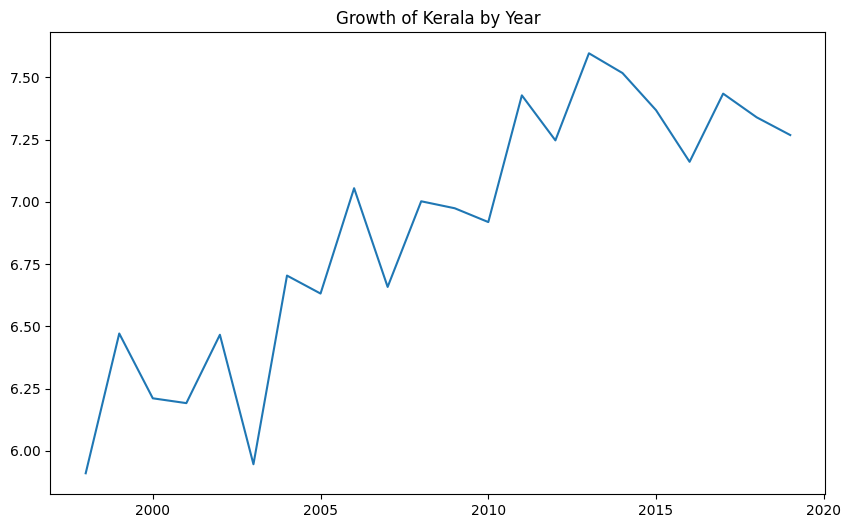

In [168]:
calc = df.groupby(['State','Crop_Year'])['Yield'].sum().reset_index()
kerala = calc[calc['State'] == 'Kerala']
plt.figure(figsize=(10,6))
plt.title('Growth of Kerala by Year')

plt.plot(kerala['Crop_Year'],kerala['Yield'])

OF KARNATAKA

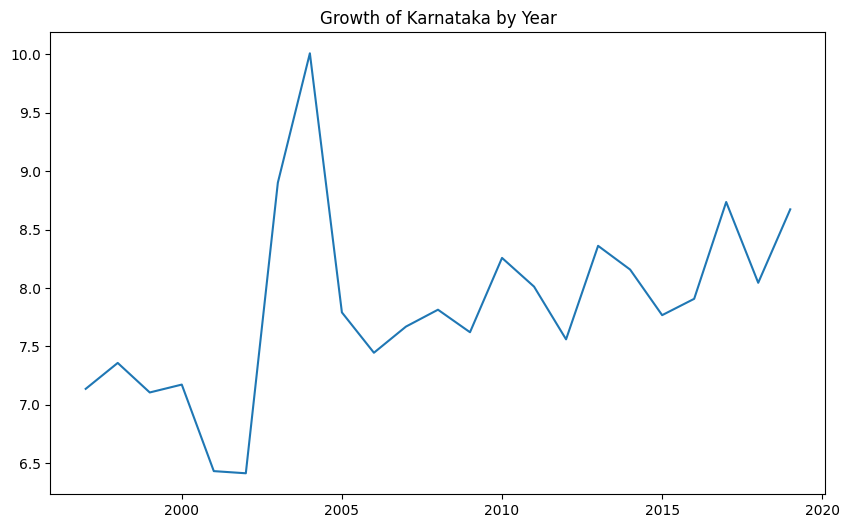

In [169]:
Kn = calc[calc['State'] == 'Karnataka']

plt.figure(figsize=(10,6))
plt.title('Growth of Karnataka by Year')
plt.plot(Kn['Crop_Year'],Kn['Yield'])

PAIRPLOT

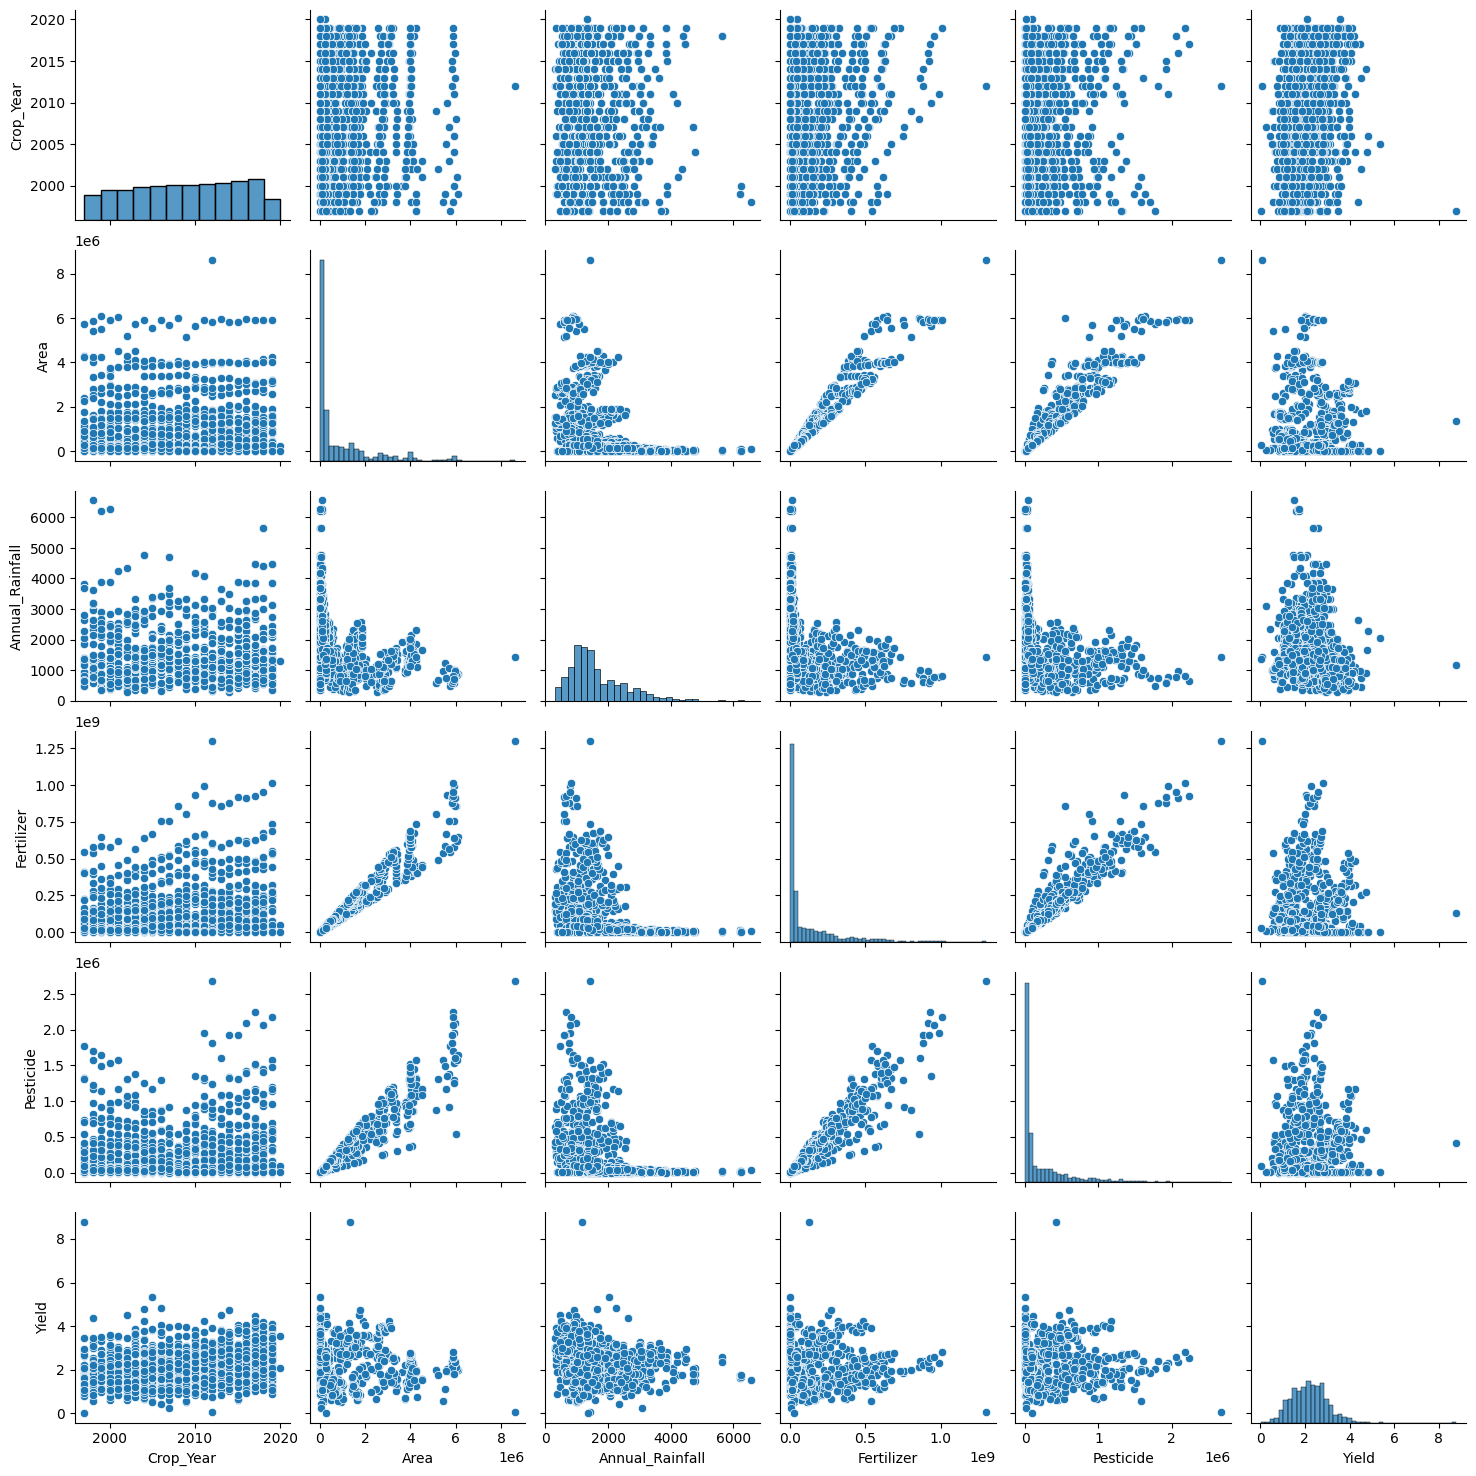

In [170]:
ned = ['Crop','Season','State','Crop_Year','Area','Annual_Rainfall','Fertilizer','Pesticide','Yield']
sf = df[ned]
sns.pairplot(sf)
plt.savefig('PairPlot.png')

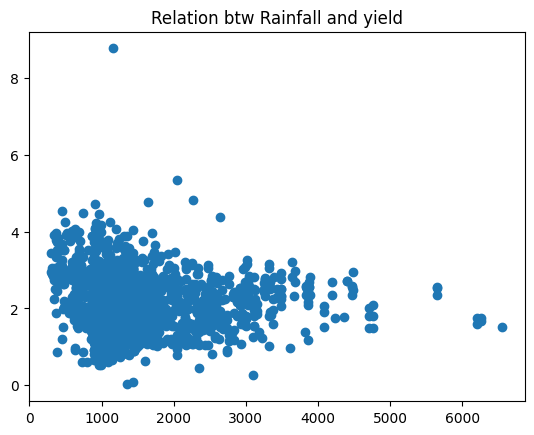

In [171]:
plt.scatter(df['Annual_Rainfall'],df['Yield'])
plt.title('Relation btw Rainfall and yield')
plt.show()

OBSERVATIONS:



IDENTIFIED RELATIONS BETWEEN VARIABLES

identified various relationships between variables. However, many of these relationships were only minuscule, indicating weak or subtle connections.
 Due to the limited strength of the relationships identified, I implemented a deep learning model using TensorFlow.

OUTLIER DETECTION :

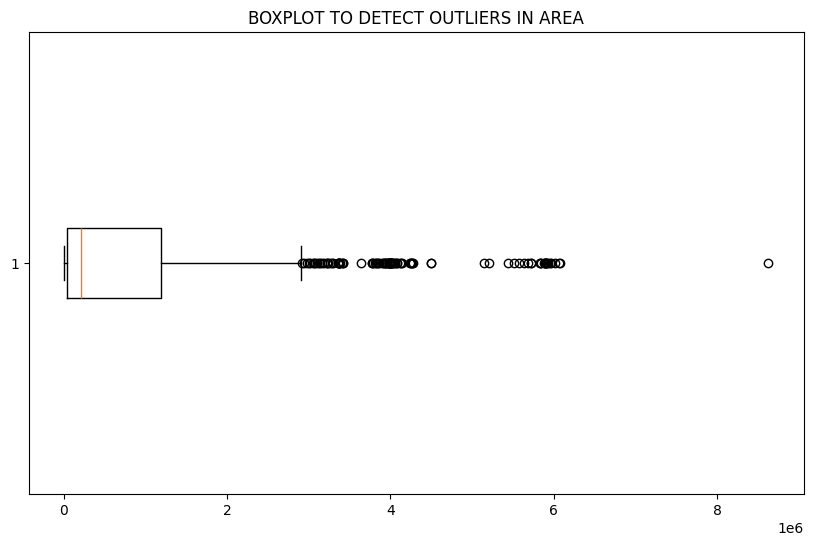

In [172]:
qf = df['Area']
plt.figure(figsize=(10, 6))
plt.boxplot(qf, vert=False)

plt.title('BOXPLOT TO DETECT OUTLIERS IN AREA')
plt.show()

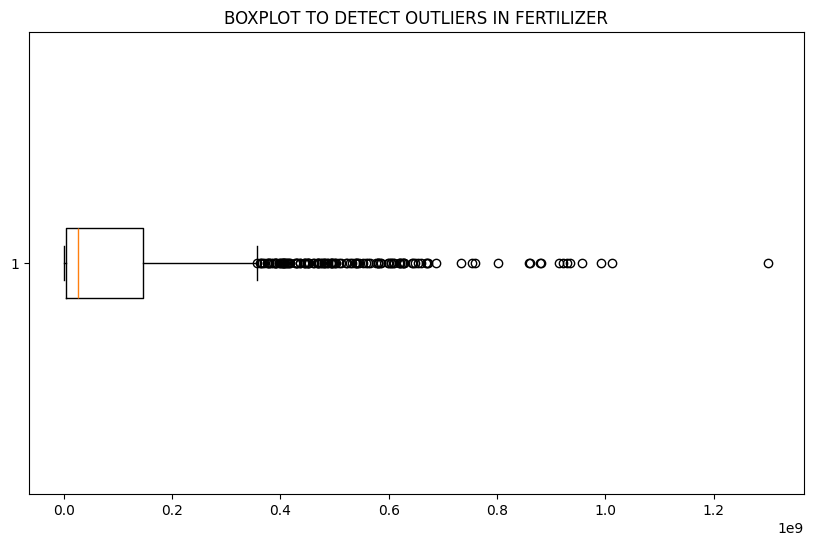

In [173]:
qf = df['Fertilizer']
plt.figure(figsize=(10, 6))
plt.boxplot(qf, vert=False)

plt.title('BOXPLOT TO DETECT OUTLIERS IN FERTILIZER')
plt.show()

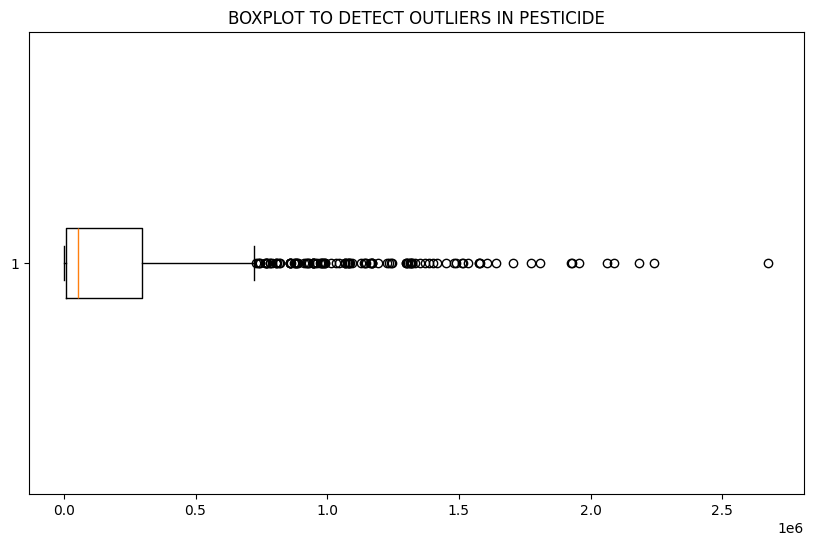

In [174]:
qf = df['Pesticide']
plt.figure(figsize=(10, 6))
plt.boxplot(qf, vert=False)

plt.title('BOXPLOT TO DETECT OUTLIERS IN PESTICIDE')
plt.show()

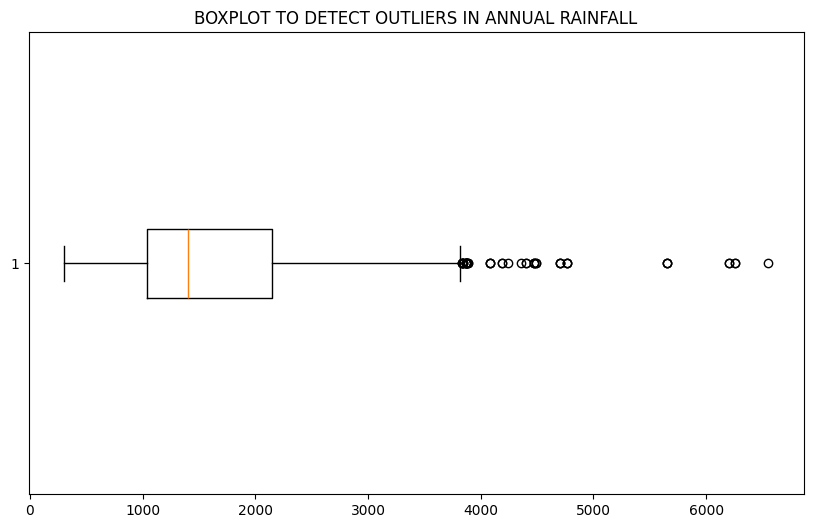

In [175]:
qf = df['Annual_Rainfall']
plt.figure(figsize=(10, 6))
plt.boxplot(qf, vert=False)

plt.title('BOXPLOT TO DETECT OUTLIERS IN ANNUAL RAINFALL')
plt.show()

IDENTIFIED OUTLIERS IN VARIOUS VARIABLES

OUTLIER REMOVING:

USING STD METHOD

In [176]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
16,Rice,1997,Autumn,Assam,607358.0,398311,2051.4,5.780226e+07,188280.98,0.780870
17,Rice,1997,Summer,Assam,174974.0,209623,2051.4,1.665228e+07,54241.94,1.060435
18,Rice,1997,Winter,Assam,1743321.0,1647296,2051.4,1.659119e+08,540429.51,0.941304
51,Rice,1997,Kharif,Karnataka,1031530.0,2340493,1266.7,9.817071e+07,319774.30,2.233500
52,Rice,1997,Rabi,Karnataka,53889.0,109350,1266.7,5.128616e+06,16705.59,2.073846


In [177]:
mean = df['Fertilizer'].mean()
std = df['Fertilizer'].std()

upper = mean + 2 * std
lower = mean - 2 * std

df = df[(df['Fertilizer'] >= lower) & (df['Fertilizer'] <= upper)]


In [178]:
df.shape

(1120, 10)

In [179]:
mean = df['Pesticide'].mean()
std = df['Pesticide'].std()

upper = mean + 2 * std
lower = mean - 2 * std

df = df[(df['Pesticide'] >= lower) & (df['Pesticide'] <= upper)]

In [180]:
df.shape

(1051, 10)

Std scaling

In [181]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



df['Area_scaled'] = scaler.fit_transform(df[['Area']])
df['Production_scaled'] = scaler.fit_transform(df[['Production']])
df['Annual_Rainfall_scaled'] = scaler.fit_transform(df[['Annual_Rainfall']])
df['Fertilizer_scaled'] = scaler.fit_transform(df[['Fertilizer']])
df['Pesticide_scaled'] = scaler.fit_transform(df[['Pesticide']])
df['Yield_scaled'] = scaler.fit_transform(df[['Yield']])

In [182]:
needed = ['Crop','Season','State','Crop_Year','Area_scaled','Area','Production_scaled','Annual_Rainfall_scaled','Annual_Rainfall','Fertilizer','Fertilizer_scaled','Yield_scaled','Yield','Pesticide','Pesticide_scaled']
pf = df[needed]

In [183]:
from sklearn.preprocessing import LabelEncoder

li = LabelEncoder()

pf['Crop_encoded'] = li.fit_transform(pf['Crop'])
pf['season_en'] = li.fit_transform(pf['Season'])
pf['state_en'] = li.fit_transform(pf['State'])


In [184]:
pf.head()

,Crop,Season,State,Crop_Year,Area_scaled,Area,Production_scaled,Annual_Rainfall_scaled,Annual_Rainfall,Fertilizer,Fertilizer_scaled,Yield_scaled,Yield,Pesticide,Pesticide_scaled,Crop_encoded,season_en,state_en
16,Rice,Autumn,Assam,1997,0.296760,607358.0,-0.367090,0.326826,2051.4,5.780226e+07,0.006217,-1.801357,0.780870,188280.98,0.518682,0,0,2
17,Rice,Summer,Assam,1997,-0.417892,174974.0,-0.480842,0.326826,2051.4,1.665228e+07,-0.494163,-1.452173,1.060435,54241.94,-0.363076,0,3,2
18,Rice,Winter,Assam,1997,2.174300,1743321.0,0.385865,0.326826,2051.4,1.659119e+08,1.320821,-1.600970,0.941304,540429.51,2.835247,0,5,2
51,Rice,Kharif,Karnataka,1997,0.997839,1031530.0,0.803762,-0.484453,1266.7,9.817071e+07,0.497094,0.013012,2.233500,319774.30,1.383694,0,1,11
52,Rice,Rabi,Karnataka,1997,-0.618024,53889.0,-0.541292,-0.484453,1266.7,5.128616e+06,-0.634290,-0.186399,2.073846,16705.59,-0.610005,0,2,11


HEATMAP

In [185]:
ned = ['Crop_Year','Area','Annual_Rainfall','Fertilizer','Pesticide','Yield']
sf = df[ned]
sf['Season'] = pf['season_en']
sf['State'] = pf['state_en']

sf.head()

C:\Users\lijaz\AppData\Local\Temp\ipykernel_10308\272658216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf['Season'] = pf['season_en']
C:\Users\lijaz\AppData\Local\Temp\ipykernel_10308\272658216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf['State'] = pf['state_en']


,Crop_Year,Area,Annual_Rainfall,Fertilizer,Pesticide,Yield,Season,State
16,1997,607358.0,2051.4,5.780226e+07,188280.98,0.780870,0,2
17,1997,174974.0,2051.4,1.665228e+07,54241.94,1.060435,3,2
18,1997,1743321.0,2051.4,1.659119e+08,540429.51,0.941304,5,2
51,1997,1031530.0,1266.7,9.817071e+07,319774.30,2.233500,1,11
52,1997,53889.0,1266.7,5.128616e+06,16705.59,2.073846,2,11


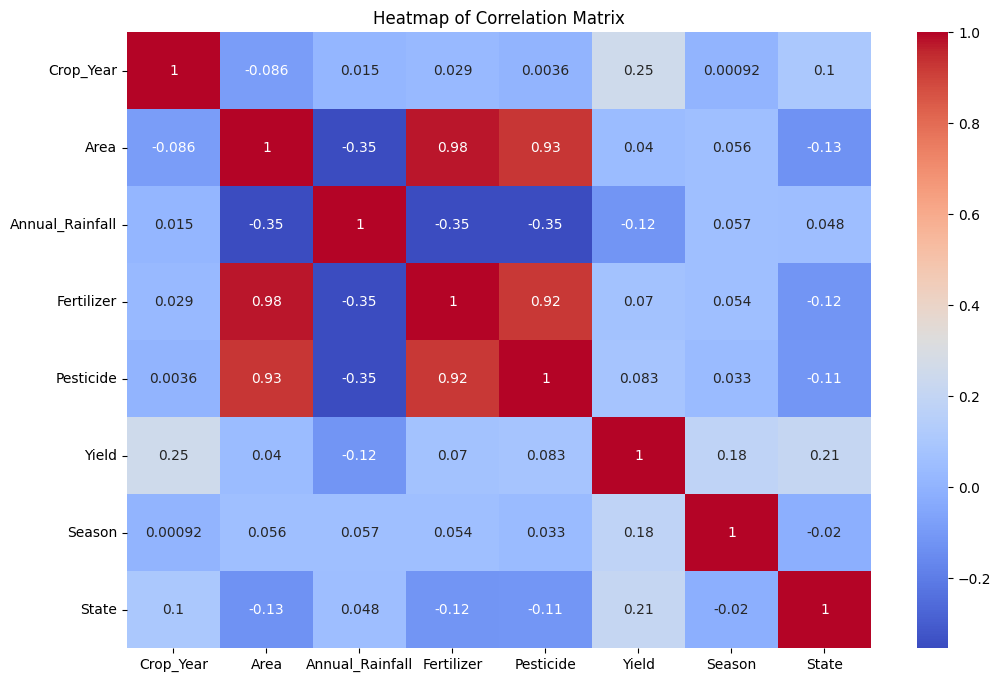

In [186]:
correlation_matrix = sf.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

Train test split

In [187]:
from sklearn.model_selection import train_test_split

x = pf[['state_en','season_en','Area_scaled','Annual_Rainfall','Fertilizer_scaled','Pesticide_scaled']]
y = pf[['Yield']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

TENSORFLOW

In [198]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(x_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  
])

c:\Users\lijaz\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [199]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mean_absolute_error','mean_absolute_percentage_error'])

In [200]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

TRAINING

In [201]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2618.1875 - mean_absolute_error: 35.0130 - mean_absolute_percentage_error: 1888.4205 - val_loss: 265.8645 - val_mean_absolute_error: 14.7583 - val_mean_absolute_percentage_error: 757.3419
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 675.1302 - mean_absolute_error: 17.9844 - mean_absolute_percentage_error: 1063.0657 - val_loss: 10.1527 - val_mean_absolute_error: 3.0704 - val_mean_absolute_percentage_error: 147.5566
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 400.1141 - mean_absolute_error: 12.7632 - mean_absolute_percentage_error: 683.1678 - val_loss: 2.0721 - val_mean_absolute_error: 1.1502 - val_mean_absolute_percentage_error: 49.5612
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 180.0307 - mean_absolute_error: 9.4427 - mean_absolute_percentage_error: 677.3074 - val_loss: 1.8385 - val_mean_absolute_error: 1.0672 - val_mean_absolute_percentage_error: 47.1998
Epoch 5/100
27/27 ━━━━━━━━━━

In [202]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.7447 - mean_absolute_error: 0.6766 - mean_absolute_percentage_error: 34.0639  


[0.837027907371521, 0.7133901119232178, 34.8688850402832]

In [203]:
preds = model.predict(x_test)
preds.size


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


211

In [204]:
a, x_test2, b , y_test2 = train_test_split(x,y,test_size=0.8,random_state=42)

In [205]:
preds2 = model.predict(x_test2)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step


In [206]:
from sklearn.metrics import mean_absolute_error

sn = mean_absolute_error(preds2,y_test2)

print(sn)


0.7886352662719079
